<a href="https://colab.research.google.com/github/LeeHuiJong/-Deep_learning/blob/main/ch03_03_NLP%EA%B8%B0%EC%B4%88_%EC%88%9C%ED%99%98%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.03 NLP기초 - 순환 신경망
---

* 날짜:
* 이름:


## 학습내용
    - 순환 신경망에 대해 이해한다.
    - RNN
    - GRU
    - LSTM

```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/scripts')
from import_lib import *
from plot_result import *

## imdb 베이스 모델
---

### **| imdb 데이터 처리**
```
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)
```

In [3]:
MAX_LEN = 256
MAX_FEATURES = 10000

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_FEATURES)
x_train = preprocessing.sequence.pad_sequences(x_train,
                                               padding='post',
                                               maxlen=MAX_LEN)

x_test = preprocessing.sequence.pad_sequences(x_test,
                                              padding='post',
                                              maxlen=MAX_LEN)
print(x_train.shape, x_test.shape)

17473536/17464789 [==============================] - 0s 0us/step
(25000, 256) (25000, 256)


### **| FCN with GlobalAveragePooling1D**

Model: "FCNwithGAP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 256, 32)           320000    
                                                                 
 global_average_pooling1d_3   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 6ms/step - loss: 0.6805 - acc: 0.6949 - val_loss: 0.6635 - 

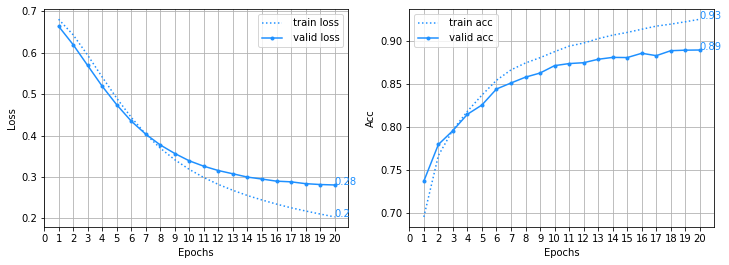

In [9]:
EMB_DIMS = 32
x = layers.Input(shape = MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GlobalAveragePooling1D()(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x, y, name = 'FCNwithGAP')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                     epochs = 20,
                     batch_size = 128,
                     validation_split = 0.2)

plot_lcurve([history], [''], ['dodgerblue'])

## RNN
---
x가 샘플 하나에 있는 단어들을 나타냄

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image6_f6vds6.png width=800>
</p>

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_7 (Embedding)     (None, 256, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
157/157 [==============================] - 41s 251ms/step - loss: 0.6918 - acc: 0.5105 - val_loss: 0.6881 - val_acc: 0.5230
Epoch 2/5
157/157 [==============================] - 39

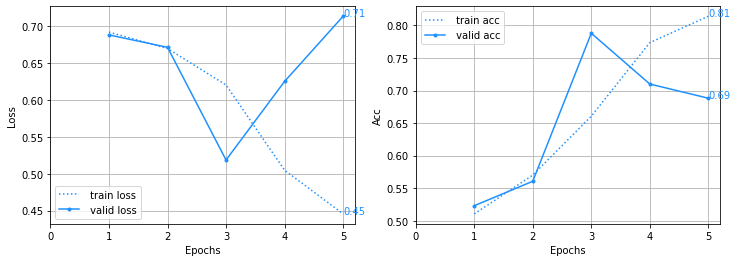

In [11]:
EMB_DIMS = 32
x = layers.Input(shape = MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.SimpleRNN(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x, y, name = 'RNN')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                     epochs = 5,
                     batch_size = 128,
                     validation_split = 0.2)

plot_lcurve([history], [''], ['dodgerblue'])

## LSTM
---

<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442110/image3_nsnxp3.png width=600>
</p>



Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256)]             0         
                                                                 
 embedding_8 (Embedding)     (None, 256, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 8s 18ms/step - loss: 0.6978 - acc: 0.5382 - val_loss: 0.6718 - val_acc: 0.5774
Epoch 2/20
157/157 [==============================] - 2s

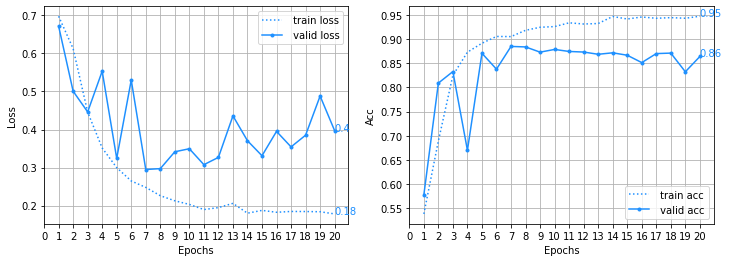

In [12]:
EMB_DIMS = 32
x = layers.Input(shape = MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y)
model = models.Model(x, y, name = 'RNN')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                     epochs = 20,
                     batch_size = 128,
                     validation_split = 0.2)

plot_lcurve([history], [''], ['dodgerblue'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>


Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 256, 32)           320000    
                                                                 
 lstm_4 (LSTM)               (None, 256, 32)           8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 336,673
Trainable params: 336,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 9s 

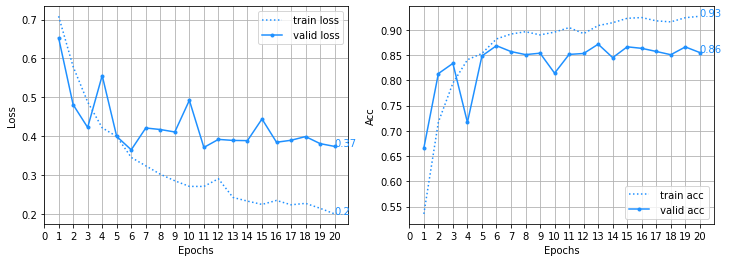

In [15]:
EMB_DIMS = 32
x = layers.Input(shape = MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.LSTM(32, return_sequences = True)(y) # 2차 텐서가 출력된다. (many to many)
y = layers.LSTM(32, return_sequences = False)(y) # 1차 텐서가 출력된다. (many to one)
y = layers.Dense(1, activation = 'sigmoid')(y) # 1차 텐서만 입력 받을 수 있다.
model = models.Model(x, y, name = 'RNN')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                     epochs = 20,
                     batch_size = 128,
                     validation_split = 0.2)

plot_lcurve([history], [''], ['dodgerblue'])

## GRU
---


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image10_zgefie.png width=600>
</p>



Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 256)]             0         
                                                                 
 embedding_12 (Embedding)    (None, 256, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
157/157 [==============================] - 5s 18ms/step - loss: 0.6925 - acc: 0.5210 - val_loss: 0.6682 - val_acc: 0.5612
Epoch 2/20
157/157 [==============================] - 2s

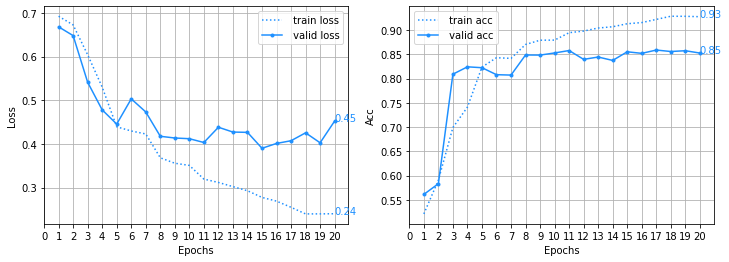

In [16]:
EMB_DIMS = 32
x = layers.Input(shape = MAX_LEN)
y = layers.Embedding(MAX_FEATURES, EMB_DIMS)(x)
y = layers.GRU(32)(y)
y = layers.Dense(1, activation = 'sigmoid')(y) # 1차 텐서만 입력 받을 수 있다.
model = models.Model(x, y, name = 'RNN')
model.summary()

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

history = model.fit(x_train, y_train,
                     epochs = 20,
                     batch_size = 128,
                     validation_split = 0.2)

plot_lcurve([history], [''], ['dodgerblue'])

### | **many-to-many**


<p align='center'>
<img src=https://res.cloudinary.com/dyd911kmh/image/upload/v1647442111/image9_e1gwba.png width=700>
</p>
